In [1]:
# Install necessary libraries if not already installed
!pip install numpy networkx matplotlib pandas seaborn

In [2]:
# Import required libraries
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from google.colab import files

# Set random seed for reproducibility
np.random.seed(42)

# Model Parameters
n = 100  # Number of players (nodes in the network)
theta = 2  # Cost function exponent (convexity of cost function)
beta = 2  # Public good multiplier (benefit factor)
epsilon = 1e-5  # Convergence threshold for Nash equilibrium
max_iter = 1000  # Maximum number of iterations for iterative best response

# Generate Erdős-Rényi graph (random network model)
p = 0.1  # Probability of edge creation
network = nx.erdos_renyi_graph(n, p, seed=42)  # Create a random network
adj_matrix = nx.to_numpy_array(network)  # Convert the network into an adjacency matrix

# Compute node degrees (number of neighbors for each player)
degrees = adj_matrix.sum(axis=1)

# Avoid division by zero for nodes with degree = 0 (to prevent mathematical errors)
safe_degrees = np.where(degrees > 0, degrees, 1e-8)

# Define altruism values using a balanced Beta distribution (ensuring realistic distribution)
alpha = np.random.beta(a=2, b=2, size=n)  # Beta(2,2) gives a distribution centered around 0.5
alpha = np.clip(alpha, 0, 1)  # Ensures that all alpha values remain within [0,1] range

# Initialize variables for Iterative Best Response (IBR) Nash Equilibrium Calculation
c_fp = np.zeros(n)  # Initial contributions set to zero
c_new = np.zeros_like(c_fp)  # Temporary storage for updated contributions

# Iterative Best Response Algorithm to find Nash equilibrium
for iteration in range(max_iter):
    for i in range(n):
        neighbor_contributions = adj_matrix[i, :] @ c_fp  # Compute total contribution from neighbors
        if degrees[i] > 0:
            # Compute best response contribution for player i based on neighbors' contributions
            c_new[i] = ((beta / (theta * safe_degrees[i])) * (1 + alpha[i] * neighbor_contributions)) ** (1 / (theta - 1))
        else:
            c_new[i] = 0  # If degree is zero, contribution remains zero

    # Check for convergence: Stop if the change is below a threshold
    if np.mean(np.abs(c_new - c_fp)) < epsilon:
        break

    c_fp = c_new.copy()  # Update contributions for the next iteration

# Store results in a DataFrame
results_df = pd.DataFrame({
    "Player": np.arange(n),  # Player index
    "Degree": degrees,  # Number of neighbors each player has
    "Alpha": alpha,  # Altruism level of each player
    "Optimal Contribution": c_fp  # Nash equilibrium contribution for each player
})

# Plot the distribution of altruism values to verify the Beta distribution
# plt.figure(figsize=(8, 5))
# sns.histplot(alpha, bins=20, kde=True, color="blue", edgecolor="black")  # Altruism histogram
# plt.xlabel("Altruism Parameter (Alpha)")
# plt.ylabel("Frequency")
# plt.title("Distribution of Altruism (Balanced Beta Distribution)")
# plt.grid(True)
# plt.show()


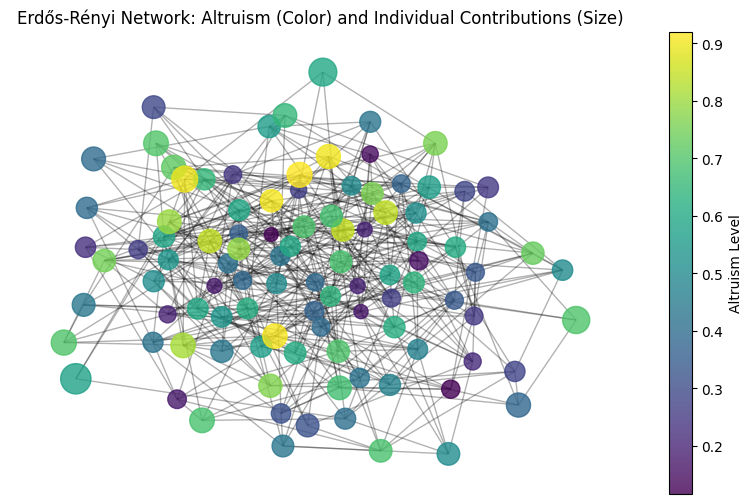

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
# Erdős-Rényi Network Visualization: Altruism (Color) & Contributions (Node Size)
plt.figure(figsize=(10, 6))

# Compute network layout for visualization
pos = nx.spring_layout(network, seed=42)  # Force-directed layout

# Normalize node sizes (clip to prevent invisible or overly large nodes)
node_sizes = np.clip(results_df["Optimal Contribution"] * 1000, 10, 500)
node_colors = results_df["Alpha"]  # Altruism parameter

# Draw edges first for better visibility
nx.draw_networkx_edges(network, pos, alpha=0.3)

# Draw nodes with color and size based on attributes
sc = nx.draw_networkx_nodes(
    network, pos,
    node_color=node_colors,
    node_size=node_sizes,
    cmap=plt.cm.viridis, alpha=0.8
)

# Add colorbar to show altruism levels
plt.colorbar(sc, label="Altruism Level")

# Title and display settings
plt.title("Erdős-Rényi Network: Altruism (Color) and Individual Contributions (Size)")
plt.axis("off")  # Hide axes for better visualization

# Save and download the figure
plt.savefig("erdos_renyi_network.png", dpi=300, bbox_inches="tight")  # Save first
plt.show()  # Then show

files.download("erdos_renyi_network.png")  # Finally, download


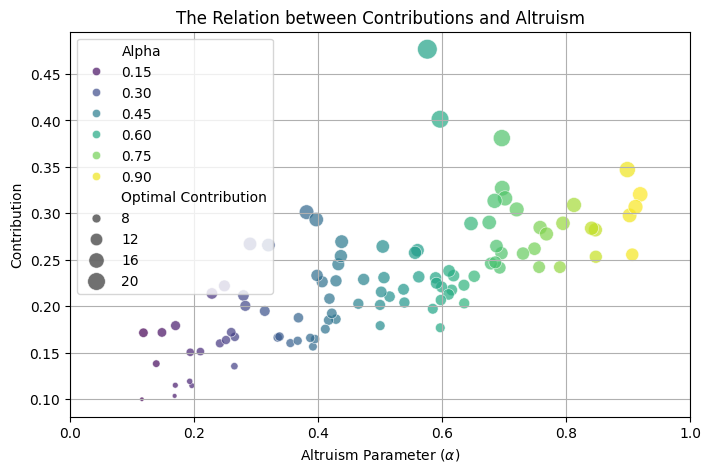

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [4]:
# Create the scatter plot for contributions vs. altruism
plt.figure(figsize=(8, 5))

# Enhanced scatterplot with color mapping
sns.scatterplot(
    x=results_df["Alpha"],
    y=results_df["Optimal Contribution"],
    hue=results_df["Alpha"],  # Color based on altruism
    size=results_df["Optimal Contribution"] * 50,  # Scale size for better visibility
    sizes=(10, 200),  # Set min-max size
    palette="viridis",
    alpha=0.7
)

# Labeling the axes and the title
plt.xlabel("Altruism Parameter ($\\alpha$)")
plt.ylabel("Contribution")
plt.title("The Relation between Contributions and Altruism")

# Adjust axis limits
plt.xlim(0, 1)  # Altruism is bounded between 0 and 1
plt.grid(True)

# Save and display
plt.savefig("contributions_vs_altruism.png", dpi=300, bbox_inches="tight")  # Save first
plt.show()  # Then show
files.download("contributions_vs_altruism.png")  # Finally, download



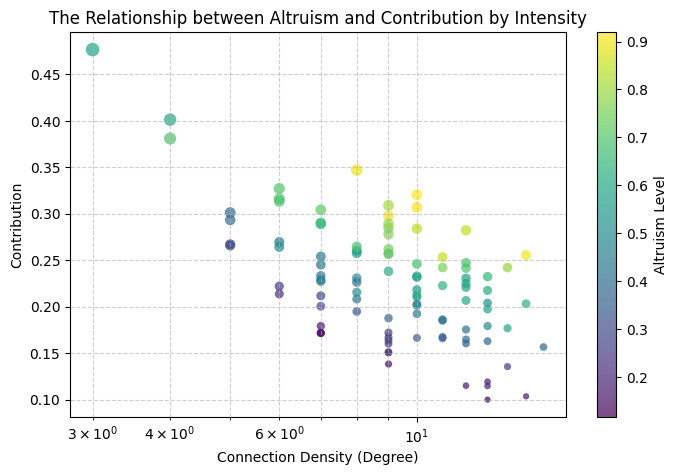

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [5]:
# Scatter Plot: Relationship Between Altruism, Contribution, and Connection Density
plt.figure(figsize=(8, 5))

# Normalize point sizes based on contributions
s = np.clip(results_df["Optimal Contribution"] * 200, 10, 300)

# Create scatter plot with improved visibility (soft edges)
sc = plt.scatter(
    results_df["Degree"], results_df["Optimal Contribution"],
    c=results_df["Alpha"], s=s, cmap="viridis", alpha=0.7, edgecolors="none"
)

# Add colorbar to indicate altruism levels
plt.colorbar(sc, label="Altruism Level")

# Set labels and title
plt.xlabel("Connection Density (Degree)")
plt.ylabel("Contribution")
plt.title("The Relationship between Altruism and Contribution by Intensity")

# Log scale for better visualization
plt.xscale("log")
plt.grid(True, which="both", linestyle="--", alpha=0.6)

# Save and display
filename = "altruism_vs_contribution_by_density.png"  # Updated file name
plt.savefig(filename, dpi=300, bbox_inches="tight")  # Save first
plt.show()  # Then display the plot
files.download(filename)  # Finally, download


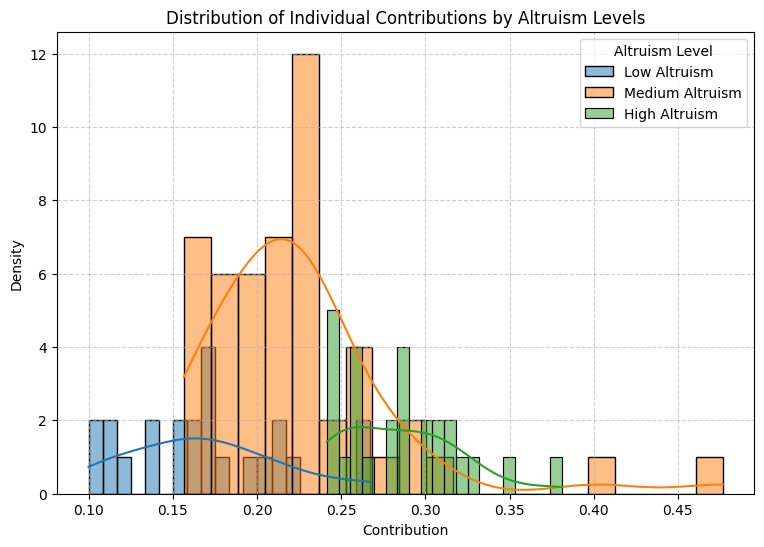

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [6]:
# Define Altruism Categories
altruism_categories = {
    "Low Altruism": (0.0, 0.33),
    "Medium Altruism": (0.33, 0.66),
    "High Altruism": (0.66, 1.0)
}

# Assign category labels
results_df["Altruism Category"] = pd.cut(results_df["Alpha"], bins=[0, 0.33, 0.66, 1.0],
                                         labels=["Low Altruism", "Medium Altruism", "High Altruism"])

# Set color palette for altruism levels
palette = {"Low Altruism": "#1f77b4", "Medium Altruism": "#ff7f0e", "High Altruism": "#2ca02c"}

# Plot: KDE and Histogram of Contribution by Altruism Category
plt.figure(figsize=(9, 6))

for category, color in palette.items():
    subset = results_df[results_df["Altruism Category"] == category]
    sns.histplot(subset["Optimal Contribution"], kde=True, bins=20, color=color, label=category, alpha=0.5)

# Labels and title
plt.xlabel("Contribution")
plt.ylabel("Density")
plt.title("Distribution of Individual Contributions by Altruism Levels")

# Improve legend placement
plt.legend(title="Altruism Level", loc="upper right")

# Grid for better readability
plt.grid(True, which="both", linestyle="--", alpha=0.6)

# Save and display
filename = "contribution_distribution_by_altruism.png"
plt.savefig(filename, dpi=300, bbox_inches="tight")  # Save first
plt.show()  # Then display the plot
files.download(filename)  # Finally, download


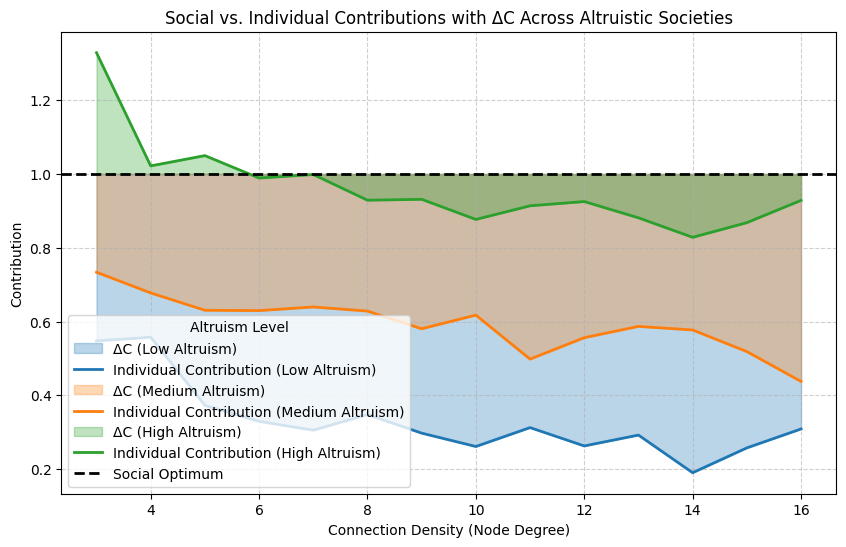

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [7]:
# Dictionary to store individual and social contributions
individual_contributions_per_degree = {}
delta_c_per_degree = {}

# Loop through each altruism category and compute values
for category, (alpha_min, alpha_max) in altruism_categories.items():
    # Generate random altruism values
    scenario_alpha = np.random.uniform(alpha_min, alpha_max, n)

    # Compute individual optimal contributions (c_fp) per player
    scenario_c_fp = np.array([
        ((beta / (theta * safe_degrees[i])) * (1 + scenario_alpha[i] * degrees[i])) ** (1 / (theta - 1))
        if degrees[i] > 0 else 0
        for i in range(n)
    ])

    # Compute social optimal contribution (same for all)
    c_social_optimal = (beta / theta) ** (1 / (theta - 1))

    # Compute ΔC = Social Optimum - Individual Optimal
    scenario_delta_c = c_social_optimal - scenario_c_fp

    # Store mean values per degree
    contribution_df = pd.DataFrame({"Degree": degrees, "Individual Contribution": scenario_c_fp})
    individual_contributions_per_degree[category] = contribution_df.groupby("Degree")["Individual Contribution"].agg(["mean"])

    # Store ΔC per degree
    delta_c_per_degree[category] = (c_social_optimal - contribution_df.groupby("Degree")["Individual Contribution"].agg(["mean"]))

# **Plot Contributions with ΔC as a shaded area**
plt.figure(figsize=(10, 6))

# **Use the same color palette for consistency**
colors = {"Low Altruism": "#1f77b4", "Medium Altruism": "#ff7f0e", "High Altruism": "#2ca02c"}

# Plot individual contributions and shaded ΔC area
for category in altruism_categories.keys():
    contribution_values = individual_contributions_per_degree[category]
    delta_c_values = delta_c_per_degree[category]

    # Plot shaded area (ΔC)
    plt.fill_between(contribution_values.index, contribution_values["mean"], c_social_optimal,
                     color=colors[category], alpha=0.3, label=f"ΔC ({category})")

    # Plot individual contribution line
    plt.plot(contribution_values.index, contribution_values["mean"], color=colors[category], linestyle="solid", linewidth=2, label=f"Individual Contribution ({category})")

# Plot social optimum as a dashed line
plt.axhline(y=c_social_optimal, color="black", linestyle="dashed", linewidth=2, label="Social Optimum")

# Labels and title
plt.xlabel("Connection Density (Node Degree)")
plt.ylabel("Contribution")
plt.title("Social vs. Individual Contributions with ΔC Across Altruistic Societies")

# Improve legend placement
plt.legend(title="Altruism Level")

# Grid for better readability
plt.grid(True, linestyle="--", alpha=0.6)

# Save figure
filename = "contribution_vs_density_with_deltac.png"
plt.savefig(filename, dpi=300, bbox_inches="tight")

# Show plot
plt.show()

# Download file
from google.colab import files
files.download(filename)


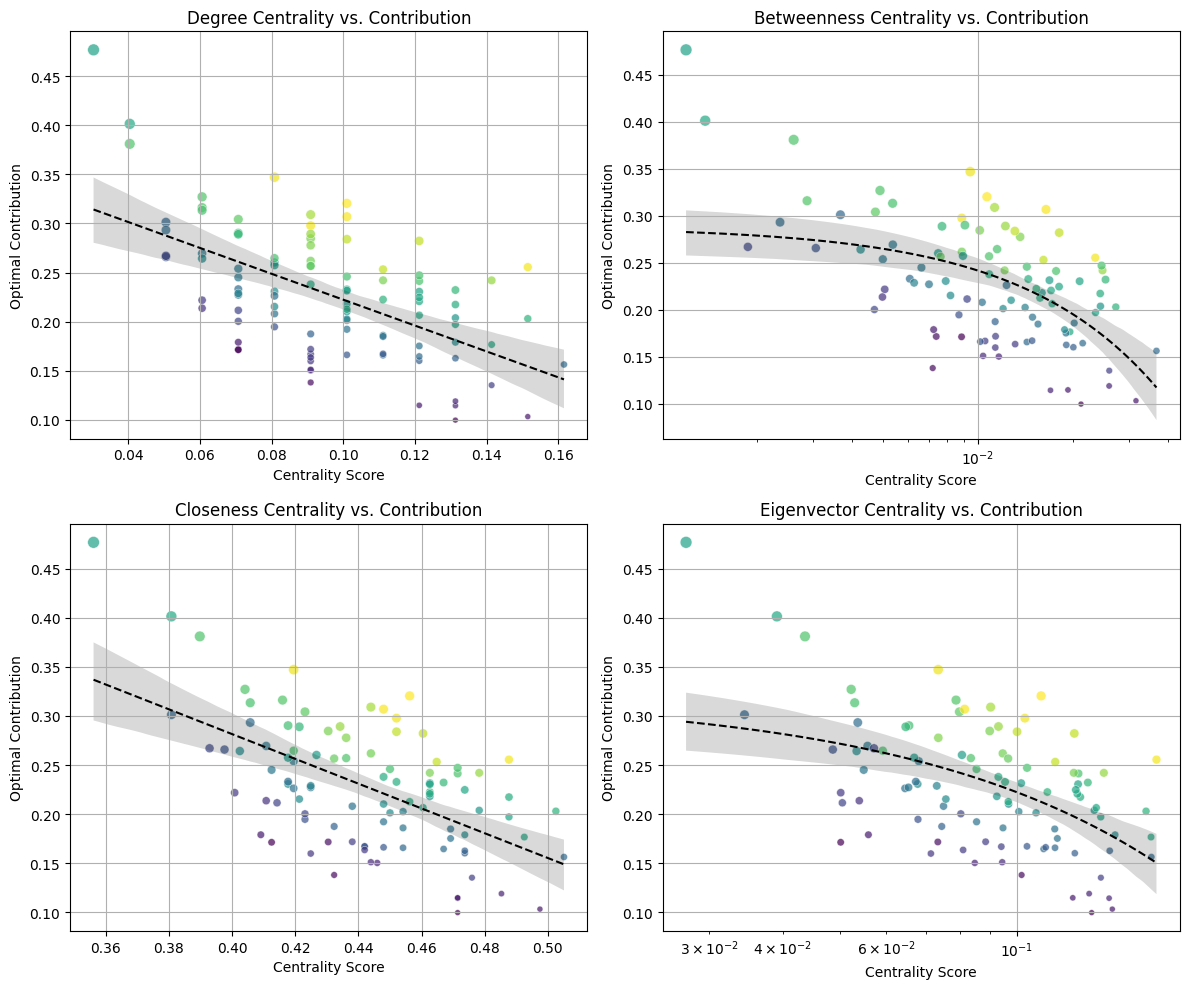

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [8]:
# Compute centrality measures for the existing network
degree_centrality = nx.degree_centrality(network)
betweenness_centrality = nx.betweenness_centrality(network)
closeness_centrality = nx.closeness_centrality(network)
eigenvector_centrality = nx.eigenvector_centrality_numpy(network)

# Store the centrality measures and contributions in a DataFrame
centrality_df = pd.DataFrame({
    "Degree Centrality": list(degree_centrality.values()),
    "Betweenness Centrality": list(betweenness_centrality.values()),
    "Closeness Centrality": list(closeness_centrality.values()),
    "Eigenvector Centrality": list(eigenvector_centrality.values()),
    "Optimal Contribution": c_fp,
    "Altruism": alpha  # Include altruism values for coloring
})

# Set up a 2x2 grid for centrality plots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Define centrality types
centrality_types = [
    ("Degree Centrality", axes[0, 0]),
    ("Betweenness Centrality", axes[0, 1]),
    ("Closeness Centrality", axes[1, 0]),
    ("Eigenvector Centrality", axes[1, 1])
]

# Create scatter plots for each centrality measure
for centrality, ax in centrality_types:
    # Scatter plot with color based on altruism
    sc = sns.scatterplot(
        data=centrality_df, x=centrality, y="Optimal Contribution", hue="Altruism",
        size="Optimal Contribution", palette="viridis", alpha=0.7, ax=ax, legend=False
    )

    # Regression trend line
    sns.regplot(
        data=centrality_df, x=centrality, y="Optimal Contribution",
        scatter=False, color="black", line_kws={"linewidth": 1.5, "linestyle": "dashed"}, ax=ax
    )

    # Log scale for better visualization of betweenness and eigenvector centrality
    if centrality in ["Betweenness Centrality", "Eigenvector Centrality"]:
        ax.set_xscale("log")

    ax.set_title(f"{centrality} vs. Contribution")
    ax.set_xlabel("Centrality Score")
    ax.set_ylabel("Optimal Contribution")
    ax.grid(True)

plt.tight_layout()
plt.savefig("centrality_vs_contribution_optimized.png", dpi=300, bbox_inches="tight")  # Save with high resolution
plt.show()

from google.colab import files
files.download("centrality_vs_contribution_optimized.png")

